# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.models_runner.tc_br_runner import TC_BR_Runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
runner_1 = TC_BR_Runner(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_union_df())

lsi_model_1, lsi_eval_1 = runner_1.run_lsi_model()
lda_model_1, lda_eval_1 = runner_1.run_lda_model()
bm25_model_1, bm25_eval_1 = runner_1.run_bm25_model()
w2v_model_1, w2v_eval_1 = runner_1.run_word2vec_model()

OracleExpertVolunteers_UNION.shape: (207, 93)
TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [3]:
results_1 = aux_functions.compile_results({'lsi_model':lsi_model_1,'lda_model':lda_model_1,'bm25_model':bm25_model_1,'w2v_model':w2v_model_1,
                                         'lsi_eval':lsi_eval_1, 'lda_eval':lda_eval_1, 'bm25_eval':bm25_eval_1, 'w2v_eval':w2v_eval_1})
results_1.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_TC_BR,0.053763,0.004537,0.008286,5.376344,0.453708,0.828613
1,LDA_Model_TC_BR,0.097815,0.141052,0.105696,9.781478,14.105207,10.569618
2,BM25_Model_TC_BR,0.164759,0.264080,0.186097,16.475893,26.407956,18.609746
3,WordVec_Model_TC_BR,0.098855,0.131348,0.104435,9.885536,13.134751,10.443501


### Plots

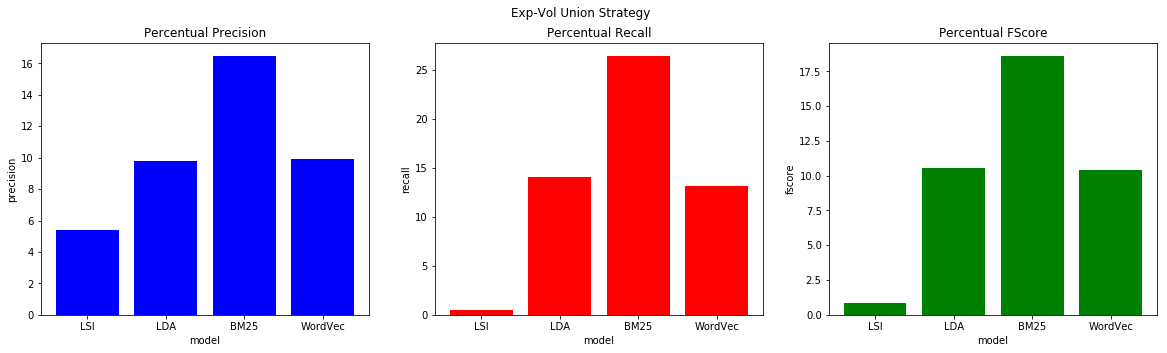

In [4]:
aux_functions.plot_results(results_1, title='Exp-Vol Union Strategy')

### Delete Variables

In [19]:
del lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1
del lsi_eval_1, lda_eval_1, bm25_eval_1, w2v_eval_1
del runner_1

## Intersec Strategy

In [5]:
runner_2 = TC_BR_Runner(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_intersec_df())

lsi_model_2, lsi_eval_2 = runner_2.run_lsi_model()
lda_model_2, lda_eval_2 = runner_2.run_lda_model()
bm25_model_2, bm25_eval_2 = runner_2.run_bm25_model()
w2v_model_2, w2v_eval_2 = runner_2.run_word2vec_model()

OracleExpertVolunteers_INTERSEC.shape: (207, 93)
TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [6]:
results_2 = aux_functions.compile_results({'lsi_model':lsi_model_2,'lda_model':lda_model_2,'bm25_model':bm25_model_2,'w2v_model':w2v_model_2,
                                         'lsi_eval':lsi_eval_2, 'lda_eval':lda_eval_2, 'bm25_eval':bm25_eval_2, 'w2v_eval':w2v_eval_2})
results_2.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_TC_BR,0.010753,0.001792,0.003072,1.075269,0.179211,0.307220
1,LDA_Model_TC_BR,0.030524,0.065862,0.040585,3.052376,6.586211,4.058496
2,BM25_Model_TC_BR,0.063822,0.134653,0.082107,6.382241,13.465344,8.210658
3,WordVec_Model_TC_BR,0.031911,0.063200,0.038736,3.191120,6.319960,3.873622


### Plots

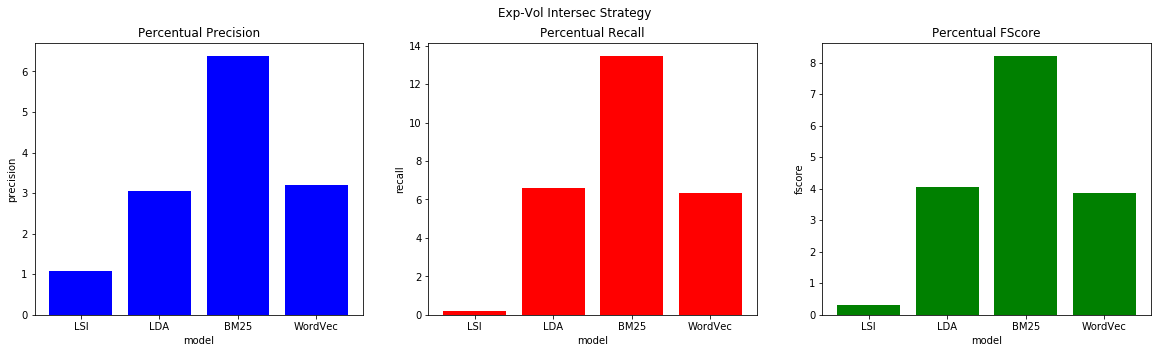

In [7]:
aux_functions.plot_results(results_2, title='Exp-Vol Intersec Strategy')

### Delete Variables

In [20]:
del lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2
del lsi_eval_2, lda_eval_2, bm25_eval_2, w2v_eval_2
del runner_2

## Expert Only Strategy

In [8]:
runner_3 = TC_BR_Runner(oracle=fd.Tc_BR_Oracles.read_oracle_expert_df())

lsi_model_3, lsi_eval_3 = runner_3.run_lsi_model()
lda_model_3, lda_eval_3 = runner_3.run_lda_model()
bm25_model_3, bm25_eval_3 = runner_3.run_bm25_model()
w2v_model_3, w2v_eval_3 = runner_3.run_word2vec_model()

OracleExpert.shape: (207, 93)
TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [9]:
results_3 = aux_functions.compile_results({'lsi_model':lsi_model_3,'lda_model':lda_model_3,'bm25_model':bm25_model_3,'w2v_model':w2v_model_3,
                                         'lsi_eval':lsi_eval_3, 'lda_eval':lda_eval_3, 'bm25_eval':bm25_eval_3, 'w2v_eval':w2v_eval_3})
results_3.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_TC_BR,0.043011,0.007089,0.011611,4.301075,0.708897,1.161110
1,LDA_Model_TC_BR,0.053417,0.094761,0.065336,5.341658,9.476062,6.533645
2,BM25_Model_TC_BR,0.112730,0.204854,0.135699,11.272980,20.485403,13.569890
3,WordVec_Model_TC_BR,0.065557,0.109768,0.074470,6.555671,10.976810,7.447026


### Plots

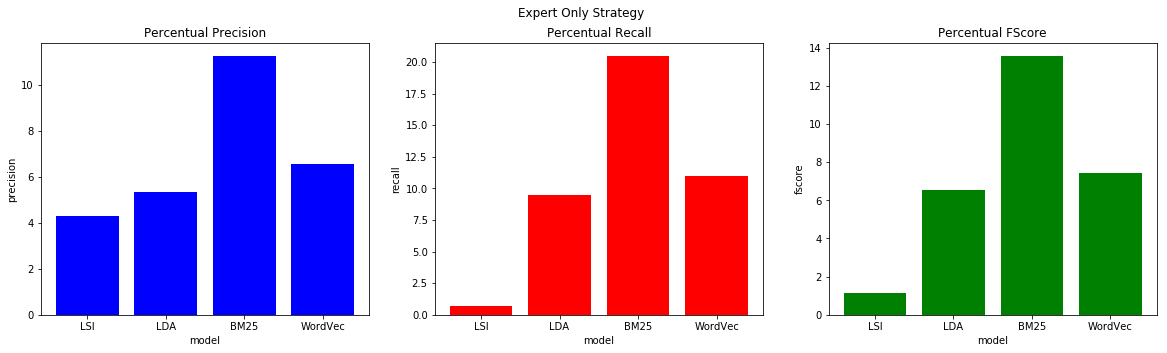

In [10]:
aux_functions.plot_results(results_3, title='Expert Only Strategy')

### Delete Variables

In [21]:
del lsi_model_3, lda_model_3, bm25_model_3, w2v_model_3
del lsi_eval_3, lda_eval_3, bm25_eval_3, w2v_eval_3
del runner_3

## Volunteers Only Strategy

In [11]:
runner_4 = TC_BR_Runner(oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df())

lsi_model_4, lsi_eval_4 = runner_4.run_lsi_model()
lda_model_4, lda_eval_4 = runner_4.run_lda_model()
bm25_model_4, bm25_eval_4 = runner_4.run_bm25_model()
w2v_model_4, w2v_eval_4 = runner_4.run_word2vec_model()

OracleVolunteers.shape: (207, 93)
TestCases.shape: (207, 12)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [12]:
results_4 = aux_functions.compile_results({'lsi_model':lsi_model_4,'lda_model':lda_model_4,'bm25_model':bm25_model_4,'w2v_model':w2v_model_4,
                                         'lsi_eval':lsi_eval_4, 'lda_eval':lda_eval_4, 'bm25_eval':bm25_eval_4, 'w2v_eval':w2v_eval_4})
results_4.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_TC_BR,0.021505,0.002230,0.004017,2.150538,0.222965,0.401749
1,LDA_Model_TC_BR,0.071800,0.124183,0.083050,7.180021,12.418257,8.305010
2,BM25_Model_TC_BR,0.115852,0.232884,0.141283,11.585154,23.288448,14.128302
3,WordVec_Model_TC_BR,0.065210,0.114371,0.074816,6.520985,11.437110,7.481635


### Plots

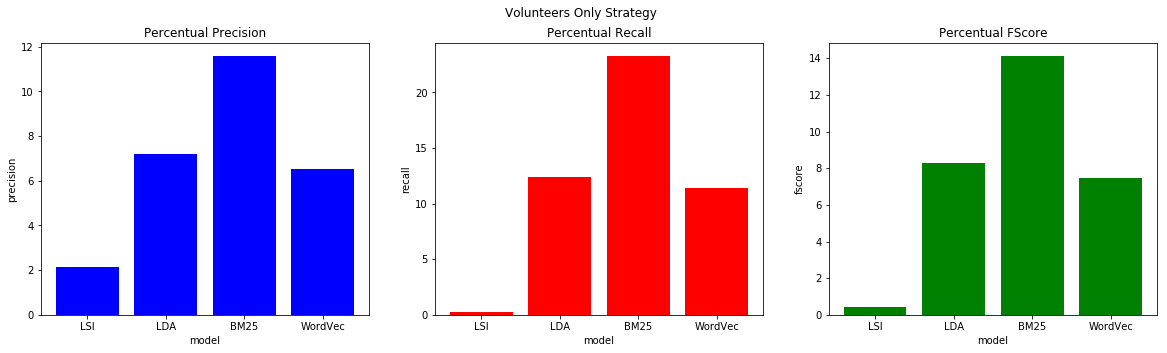

In [13]:
aux_functions.plot_results(results_4, title='Volunteers Only Strategy')

### Delete Variables

In [22]:
del lsi_model_4, lda_model_4, bm25_model_4, w2v_model_4
del lsi_eval_4, lda_eval_4, bm25_eval_4, w2v_eval_4
del runner_4